# **Plant Disease Detection System for Sustainable Agriculture**

---


### •	Problem statement
Plant diseases are a significant threat to agricultural productivity worldwide, affecting crop yield and quality. Early detection of plant diseases can help in timely intervention, reducing crop loss and ensuring better food security. Identifying diseases from images of leaves is a challenging task due to the large variation in leaf appearance across different plant species and disease types. This project goal is to develop an automated system that classifies plant diseases based on images of leaves from various crops, including Apple, Cherry, Grape, and Corn, using Convolutional Neural Networks (CNNs).
        

---


### •	Aim
To design and implement a CNN based model that accurately detects and classifies plant disease from leaf images, identifying both healthy and diseased conditions .The system aims to support precision agriculture by enabling early diagnosis and improving crop management practices.


---


### •	Learning objectives
By the end of this project, we should be able to:
1.	Understand the Basics of Convolutional Neural Networks (CNNs):
o	Learn what CNNs are and how they work for classifying images.
o	Get familiar with the main parts of a CNN, such as convolution layers, pooling layers, and fully connected layers.
2.	Preprocess Images for Machine Learning:
o	Learn how to prepare images for training, including resizing, normalizing, and enhancing images to improve model performance.
o	Understand how to handle real-world image issues, like noise and distortions, which are common in datasets.
3.	Build a CNN for Image Classification:
o	Gain hands-on experience in creating a CNN to classify images of plant leaves.
o	Learn how to train and improve the CNN using tools like TensorFlow/Keras or PyTorch.
4.	Use Transfer Learning for Better Performance:
o	Understand how transfer learning works and how to use pre-trained models to make your model more accurate without needing too much data.
5.	Evaluate and Improve Your Model:
o	Learn how to check how well your model is performing using measures like accuracy, precision, and recall.
o	Discover techniques to make your model better, including adjusting settings (hyperparameters) and preventing overfitting.
6.	Deploy Your Model as a Web App:
o	Learn how to put your trained model on the web, so others can use it, using tools like Flask or Django.
o	Understand how to make a simple webpage where people can upload leaf images and get predictions.
7.	Understand How AI is Used in Agriculture:
o	Learn about the real-world use of AI, especially in agriculture, and how it helps farmers detect plant diseases early to protect crops and improve yields.


---


### •	Proposed solution
The proposed solution is a machine learning-based system that uses Convolutional Neural Networks (CNNs) to classify plant diseases. The system will:
*	Input: Images of leaves of different crops (Apple, Cherry, Grape, and Corn).
*	Output: The predicted disease label (or healthy) for each image.
*	Approach:
*	Collect a dataset of leaf images that includes various plant diseases.
*	Preprocess the images to standardize size and perform data augmentation to prevent overfitting.
*	Train a CNN model to extract features from the images and classify them into different disease categories.
*	Use pre-trained models like VGG16, ResNet, or EfficientNet with transfer learning to improve the model’s accuracy and reduce training time.
*	Evaluate the model on a test set to assess performance and accuracy.
This system will help farmers and agricultural experts in identifying plant diseases early, enabling them to take preventive actions before the diseases spread and cause significant damage.

---


### •	Tools used
The following tools and technologies will be used to develop the plant disease detection system:

 **Programming Language**
*	Python: Python is chosen for this project due to its strong support for machine learning, computer vision, and deep learning frameworks.
 Libraries and Frameworks
*	TensorFlow/Keras or PyTorch: These deep learning frameworks will be used to implement and train the CNN model. TensorFlow/Keras is preferred for its ease of use and wide community support.
*	OpenCV/Pillow (PIL): For image processing tasks like resizing, normalization, and augmentation.
*	NumPy & Pandas: For data manipulation, such as handling images as arrays and managing the dataset.
*	Matplotlib/Seaborn: For data visualization, including plotting training curves, confusion matrices, and model performance.
*	Scikit-learn: For evaluation metrics and additional machine learning utilities like train-test splitting.
Dataset
*	PlantVillage Dataset: A large, publicly available dataset containing images of diseased and healthy leaves from a variety of crops, including Apple, Cherry, Grape, and Corn. The dataset is used to train and test the CNN model.
*	Image Augmentation: Techniques like random rotations, flips, zooms, and color variations will be used to artificially increase the dataset size and improve model generalization.
 Model Architecture
*	Convolutional Neural Networks (CNNs): CNNs are ideal for image classification tasks. Layers in the CNN architecture will include:
*	Convolutional layers: To extract local features.
*	Pooling layers: To reduce spatial dimensions and computational complexity.
*	Fully connected layers: To perform classification based on learned features.



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# prompt: generate code to unzip /content/drive/MyDrive/archive (2).zip this file at /content folder
import zipfile
import os


# Define the path to the zip file and the extraction directory
zip_file_path = "/content/drive/MyDrive/archive.zip"
extract_dir = "/content"

# Check if the zip file exists
if os.path.exists(zip_file_path):
    try:
        # Create a ZipFile object
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            # Extract all contents to the specified directory
            zip_ref.extractall(extract_dir)
        print(f"Successfully extracted '{zip_file_path}' to '{extract_dir}'")
    except zipfile.BadZipFile:
        print(f"Error: '{zip_file_path}' is not a valid zip file.")
    except Exception as e:
        print(f"An error occurred: {e}")
else:
    print(f"Error: '{zip_file_path}' does not exist.")


Successfully extracted '/content/drive/MyDrive/archive.zip' to '/content'


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import os
import glob as gb
import glob
import cv2
import tensorflow as tf

In [4]:
train='/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train'


In [5]:
size=224

In [6]:
train_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.0,
    height_shift_range=0.0,
    shear_range=0.0,
    zoom_range=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=1/255.0,
    preprocessing_function=None,
    validation_split=0.1,
).flow_from_directory(train,
                      batch_size=164,
                      target_size=(size,size),
                      subset="training",
                      color_mode='rgb', #"rgb", "rgba", or "grayscale"
                      class_mode='categorical',  # Use 'binary', 'sparse','categorical' or None as needed
                      shuffle=True)

Found 63282 images belonging to 38 classes.


In [7]:
train_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [8]:
valid='/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid'


In [9]:
valid_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    preprocessing_function=None,
    validation_split=0.1,
).flow_from_directory(valid,
                      batch_size=164,
                      target_size=(224,224),
                      subset='validation',
                      color_mode='rgb', #"rgb", "rgba", or "grayscale"
                      class_mode='categorical',  # Use 'binary', 'sparse','categorical' or None as needed
                      shuffle=False)

Found 1742 images belonging to 38 classes.


In [10]:
test='/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid'
test_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    preprocessing_function=None,
).flow_from_directory(test,
                      batch_size=164,
                      target_size=(224,224),
                      color_mode='rgb', #"rgb", "rgba", or "grayscale"
                      class_mode='categorical',  # Use 'binary', 'sparse','categorical' or None as needed
                      shuffle=False)

Found 17572 images belonging to 38 classes.


In [11]:
test_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [12]:
from tensorflow import keras
model = keras.models.Sequential()  # To build NN

model.add(keras.layers.Conv2D(filters=32, kernel_size=7, strides=1,
                padding="same", activation="relu", name="Conv1", input_shape= (224,224,3)))

model.add(keras.layers.MaxPool2D(pool_size=2, name="Pool1"))

model.add(keras.layers.Conv2D(filters=64, kernel_size=5, strides=1,
                              padding="same", activation="relu", name="Conv2"))
model.add(keras.layers.MaxPool2D(pool_size=2, name="Pool2"))

model.add(keras.layers.Conv2D(filters=128, kernel_size=3, strides=1,
                              padding="same", activation="relu", name="Conv3"))

model.add(keras.layers.Conv2D(filters=256, kernel_size=3, strides=1,
                              padding="same", activation="relu", name="Conv4"))

model.add(keras.layers.MaxPool2D(pool_size=2, name="Pool3"))

model.add(keras.layers.Flatten(name="Flatten1"))   #flatten layer - to convert into 1d vector

model.add(keras.layers.Dense(128, activation="relu", name="Dense1"))  #hidden layer
tf.keras.layers.Dropout(0.5)

model.add(keras.layers.Dense(64, activation="relu", name="Dense2"))  #hidden layer
tf.keras.layers.Dropout(0.5)

model.add(keras.layers.Dense(38, activation="softmax", name="Output"))  #output layer

# The model’s summary() method displays all the model’s layers
print(model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                       │ (None, 224, 224, 32)        │           4,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool1 (MaxPooling2D)                 │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2 (Conv2D)                       │ (None, 112, 112, 64)        │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool2 (MaxPooling2D)                 │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv3 (Conv2D)                       │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv4 (Conv2D)                       │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool3 (MaxPooling2D)                 │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten1 (Flatten)                   │ (None, 200704)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense1 (Dense)                       │ (None, 128)                 │      25,690,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense2 (Dense)                       │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output (Dense)                       │ (None, 38)                  │           2,470 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,125,990 (99.66 MB)

 Trainable params: 26,125,990 (99.66 MB)

 Non-trainable params: 0 (0.00 B)

None


In [13]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

model_ReduceLROnPlateau = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=15, min_lr=0.000001)

callbacks=[early_stopping,model_checkpoint,model_ReduceLROnPlateau]

In [14]:
model.compile(loss='categorical_crossentropy', optimizer= 'Adam', metrics=["accuracy","precision","recall"])

In [15]:
history = model.fit(train_generator,
                    epochs          = 5,
                    validation_data = valid_generator,
                    callbacks = callbacks
                    )

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


386/386 ━━━━━━━━━━━━━━━━━━━━ 942s 2s/step - accuracy: 0.2069 - loss: 3.0071 - precision: 0.5752 - recall: 0.0884 - val_accuracy: 0.5827 - val_loss: 1.4157 - val_precision: 0.7160 - val_recall: 0.4472 - learning_rate: 0.0010
Epoch 2/5
386/386 ━━━━━━━━━━━━━━━━━━━━ 850s 2s/step - accuracy: 0.6773 - loss: 1.0461 - precision: 0.8057 - recall: 0.5554 - val_accuracy: 0.7744 - val_loss: 0.7163 - val_precision: 0.8532 - val_recall: 0.7038 - learning_rate: 0.0010
Epoch 3/5
386/386 ━━━━━━━━━━━━━━━━━━━━ 860s 2s/step - accuracy: 0.8161 - loss: 0.5844 - precision: 0.8754 - recall: 0.7653 - val_accuracy: 0.8444 - val_loss: 0.4886 - val_precision: 0.8822 - val_recall: 0.8123 - learning_rate: 0.0010
Epoch 4/5
386/386 ━━━━━━━━━━━━━━━━━━━━ 850s 2s/step - accuracy: 0.8671 - loss: 0.4105 - precision: 0.9018 - recall: 0.8394 - val_accuracy: 0.8645 - val_loss: 0.4067 - val_precision: 0.8946 - val_recall: 0.8427 - learning_rate: 0.0010
Epoch 5/5
386/386 ━━━━━━━━━━━━━━━━━━━━ 859s 2s/step - accuracy: 0.8954 - l

In [16]:
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

precision = history.history['precision']
val_precision = history.history['val_precision']

recall =history.history['recall']
val_recall =history.history['val_recall']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

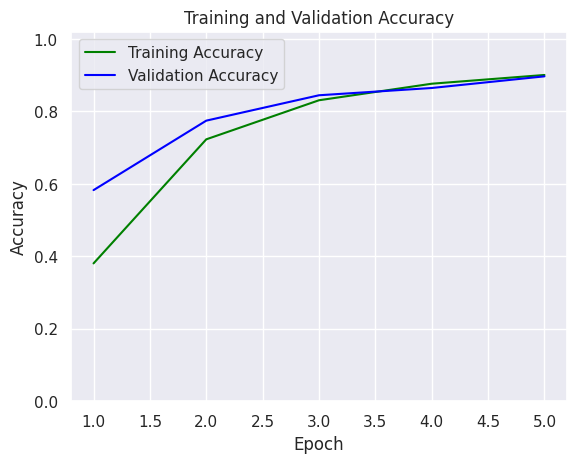

In [17]:
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim(0,1.02)
plt.show()

In [18]:
model_evaluate = model.evaluate(test_generator)
print("Loss     : ",model_evaluate[0])
print("Accuracy : ",model_evaluate[1])
print("Precision  : ",model_evaluate[2])
print("Recall : ",model_evaluate[3])

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


108/108 ━━━━━━━━━━━━━━━━━━━━ 43s 400ms/step - accuracy: 0.9118 - loss: 0.2856 - precision: 0.9263 - recall: 0.8971
Loss     :  0.30230164527893066
Accuracy :  0.9036535620689392
Precision  :  0.9222669005393982
Recall :  0.8872069120407104


In [19]:
model.save('CNN_plantdiseases_model.keras')

**WEB APPLICATION PROGRAM**


This Python-based web application uses Streamlit for building an intuitive interface to detect plant diseases. It allows users to upload an image of a plant leaf, which is processed and analyzed using a pre-trained Convolutional Neural Network (CNN) model. The application predicts the disease category or confirms a healthy plant and displays the result along with the corresponding disease name. Features include:  

1. **Image Upload**: Users can upload leaf images for disease detection.  
2. **Model Prediction**: The system preprocesses the image, runs it through a TensorFlow model, and predicts the disease class.  
3. **Interactive Design**: Includes a sidebar for navigation between the home page and disease recognition page.  
4. **Feedback Display**: Provides a visually appealing prediction result with snowflake effects for user engagement.  

This tool aids sustainable agriculture by enabling early identification of plant diseases.

In [ ]:
import streamlit as st
import tensorflow as tf
import numpy as np
import cv2
import os


# Load and preprocess the image
def model_predict(image_path):
    model = tf.keras.models.load_model(r"C:/Users/Asus/Downloads/CNN_plantdiseases_model.keras")
    img = cv2.imread(image_path)
    H,W,C = 224,224,3
    img = cv2.resize(img, (H, W))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = np.array(img)
    img = img.astype("float32")
    img = img / 255.0
    img = img.reshape(1,H,W,C)

    prediction = np.argmax(model.predict(img),axis=-1)[0]

    return prediction




st.sidebar.title("Plant Disease Detection System for Sustainable Agriculture")
app_mode = st.sidebar.selectbox("Select Page",["HOME","DISEASE RECOGNITION"])


from PIL import Image
img = Image.open(r"C:\Users\Asus\Downloads\Diseases.png")


st.image(img)

#Main Page
if(app_mode=="HOME"):
    st.markdown("<h1 style='text-align: center;'>Plant Disease Detection System for Sustainable Agriculture", unsafe_allow_html=True)

#Prediction Page
elif(app_mode=="DISEASE RECOGNITION"):
    st.header("Plant Disease Detection System for Sustainable Agriculture")
    test_image = st.file_uploader("Choose an Image:")


    if test_image is not None:

        save_path = os.path.join(os.getcwd(), test_image.name)
        print(save_path)

        with open(save_path, "wb") as f:
            f.write(test_image.getbuffer())

    if(st.button("Show Image")):
        st.image(test_image,width=4,use_column_width=True)

    #Predict button
    if(st.button("Predict")):
        st.snow()
        st.write("Our Prediction")
        result_index=model_predict(save_path)
        print(result_index)


        class_name = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy',
                    'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew',
                    'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
                    'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy',
                    'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
                    'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot',
                    'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy',
                    'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy',
                    'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew',
                    'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot',
                    'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold',
                    'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite',
                    'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus',
                      'Tomato___healthy']




        st.success("Model is Predicting it's a {}".format(class_name[result_index]))